In [120]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
from transformers import DetrFeatureExtractor, DetrForObjectDetection
import torch
from PIL import Image
import requests
import numpy as np

In [122]:
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# url ="https://farm9.staticflickr.com/8469/8391135373_86ce1ce93c_z.jpg"
# url= "https://farm2.staticflickr.com/1194/5115238891_a7f2c0f9d3_z.jpg"
# url = "https://farm4.staticflickr.com/3198/2972909304_7d9d3da7fe_z.jpg"
url = "https://farm4.staticflickr.com/3242/2761402892_67d0b4015a_z.jpg"

In [123]:
image = Image.open(requests.get(url, stream=True).raw)

In [124]:
i=np.array(image)
i=torch.tensor(i, dtype=torch.uint8)
i.shape

torch.Size([480, 640, 3])

In [125]:
new_image=torch.permute(torch.Tensor(i), (2,0,1))
new_image.shape

torch.Size([3, 480, 640])

In [126]:
new_image

tensor([[[ 39,  38,  38,  ..., 229, 235, 244],
         [ 31,  31,  30,  ..., 252, 248, 213],
         [ 25,  25,  25,  ..., 245, 252, 240],
         ...,
         [214, 214, 214,  ...,  30,  32,  34],
         [212, 213, 213,  ...,  26,  29,  32],
         [210, 211, 211,  ...,  25,  28,  31]],

        [[ 61,  60,  59,  ..., 255, 254, 255],
         [ 48,  48,  47,  ..., 251, 253, 228],
         [ 35,  35,  35,  ..., 245, 248, 237],
         ...,
         [175, 175, 175,  ...,  37,  39,  41],
         [173, 174, 174,  ...,  33,  36,  39],
         [171, 172, 172,  ...,  32,  35,  38]],

        [[ 85,  84,  86,  ..., 241, 248, 255],
         [ 66,  66,  67,  ..., 249, 247, 223],
         [ 45,  45,  47,  ..., 253, 245, 220],
         ...,
         [142, 142, 142,  ...,  43,  45,  47],
         [140, 141, 141,  ...,  39,  42,  45],
         [138, 139, 139,  ...,  38,  41,  44]]], dtype=torch.uint8)

In [127]:
feature_extractor = DetrFeatureExtractor.from_pretrained("facebook/detr-resnet-50")

In [128]:
feature_extractor

DetrFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "DetrFeatureExtractor",
  "format": "coco_detection",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "max_size": 1333,
  "size": 800
}

In [129]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

In [131]:
model

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrTimmConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  

In [132]:
inputs = feature_extractor(images=image, return_tensors="pt")
inputs

{'pixel_values': tensor([[[[-1.4500, -1.4500, -1.4672,  ...,  1.9064,  1.9920,  2.0605],
          [-1.5014, -1.5014, -1.5185,  ...,  1.9920,  1.9064,  1.8550],
          [-1.5870, -1.5870, -1.5870,  ...,  2.1290,  1.7694,  1.5297],
          ...,
          [ 1.5125,  1.5125,  1.5297,  ..., -1.6213, -1.5870, -1.5699],
          [ 1.4954,  1.4954,  1.5125,  ..., -1.6384, -1.6042, -1.5870],
          [ 1.4783,  1.4783,  1.4954,  ..., -1.6384, -1.6042, -1.5870]],

         [[-0.9678, -0.9678, -0.9853,  ...,  2.4111,  2.4286,  2.4286],
          [-1.0553, -1.0553, -1.0728,  ...,  2.4111,  2.3060,  2.2360],
          [-1.1954, -1.1954, -1.1954,  ...,  2.3936,  2.1310,  1.9559],
          ...,
          [ 0.9930,  0.9930,  1.0105,  ..., -1.4055, -1.3704, -1.3529],
          [ 0.9755,  0.9755,  0.9930,  ..., -1.4230, -1.3880, -1.3704],
          [ 0.9580,  0.9580,  0.9755,  ..., -1.4230, -1.3880, -1.3704]],

         [[-0.3230, -0.3230, -0.3404,  ...,  2.5180,  2.5877,  2.6400],
          [-0

In [133]:
outputs = model(**inputs)
outputs

DetrObjectDetectionOutput(loss=None, loss_dict=None, logits=tensor([[[-13.9799,   2.3446,  -0.5579,  ...,  -9.0443, -10.6639,   5.3319],
         [-13.2690,   3.9185,  -0.9698,  ...,  -6.6188,  -6.1486,   3.8523],
         [-15.5234,   2.0506,  -2.1472,  ..., -10.3863, -10.4597,   7.6235],
         ...,
         [-13.5087,   2.0508,  -2.1799,  ..., -10.4190,  -8.5235,   4.7535],
         [-11.8042,  11.2198,  -2.4043,  ...,  -9.5894,  -8.3911,   4.3166],
         [-13.8832,   2.5595,  -1.9584,  ...,  -8.8997,  -7.6957,   4.4618]]],
       grad_fn=<ViewBackward0>), pred_boxes=tensor([[[0.0868, 0.1266, 0.0866, 0.1614],
         [0.4384, 0.0417, 0.0247, 0.0484],
         [0.2164, 0.5227, 0.1351, 0.4574],
         [0.5172, 0.0293, 0.0539, 0.0552],
         [0.4244, 0.0254, 0.0796, 0.0505],
         [0.4183, 0.1103, 0.0877, 0.1070],
         [0.5104, 0.0856, 0.0323, 0.0848],
         [0.2254, 0.0846, 0.0594, 0.1048],
         [0.2445, 0.0198, 0.0380, 0.0395],
         [0.2380, 0.0145, 0.038

In [134]:
target_sizes = torch.tensor([image.size[::-1]])

In [135]:
target_sizes

tensor([[480, 640]])

In [136]:
results = feature_extractor.post_process(outputs, target_sizes=target_sizes)[0]

In [137]:
results

{'scores': tensor([0.1806, 0.3036, 0.1335, 0.9055, 0.9818, 0.1841, 0.6420, 0.9902, 0.3994,
         0.2649, 0.0838, 0.1254, 0.6031, 0.2968, 0.2426, 0.9825, 0.6170, 0.6276,
         0.6390, 0.1874, 0.0133, 0.4682, 0.2334, 0.1370, 0.5990, 0.3785, 0.9331,
         0.2769, 0.3953, 0.3876, 0.9876, 0.2197, 0.3374, 0.1630, 0.4273, 0.5190,
         0.2957, 0.9907, 0.4626, 0.9304, 0.7041, 0.9900, 0.8785, 0.0497, 0.9682,
         0.1542, 0.3169, 0.3524, 0.1306, 0.4230, 0.2904, 0.9862, 0.8590, 0.2908,
         0.6600, 0.8909, 0.2774, 0.9373, 0.9961, 0.1277, 0.9830, 0.9994, 0.1838,
         0.9738, 0.2733, 0.7708, 0.8829, 0.4850, 0.4356, 0.0962, 0.1585, 0.0764,
         0.8931, 0.9625, 0.0100, 0.3146, 0.9923, 0.9095, 0.7393, 0.3530, 0.1141,
         0.9686, 0.6488, 0.5032, 0.2003, 0.9587, 0.3307, 0.9599, 0.8226, 0.9951,
         0.2796, 0.2204, 0.9990, 0.9713, 0.9530, 0.9993, 0.4240, 0.9571, 0.9988,
         0.5304], grad_fn=<UnbindBackward0>),
 'labels': tensor([62,  1, 62,  3,  3, 62, 62, 62,  1

In [138]:
s=zip(results['scores'])

In [139]:
label_list=[]
box_list=[]
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    # let's only keep detections with score > 0.9
    if score > 0.9:
        label_list.append(model.config.id2label[label.item()])
        box_list.append(box)
        print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
        )
y=torch.Tensor(box_list)
y=y.to(torch.int)
print(label_list)
print(y)

Detected car with confidence 0.906 at location [313.74, 0.84, 348.23, 27.32]
Detected car with confidence 0.982 at location [246.13, 0.08, 297.1, 24.34]
Detected chair with confidence 0.99 at location [125.27, 15.44, 163.27, 65.73]
Detected person with confidence 0.983 at location [80.92, 0.08, 113.2, 56.26]
Detected chair with confidence 0.933 at location [535.22, 135.91, 609.37, 247.24]
Detected chair with confidence 0.988 at location [0.03, 18.95, 46.1, 134.94]
Detected person with confidence 0.991 at location [155.97, 0.18, 184.23, 56.55]
Detected person with confidence 0.93 at location [385.66, 12.28, 401.68, 32.2]
Detected person with confidence 0.99 at location [425.58, 9.56, 456.25, 53.63]
Detected chair with confidence 0.968 at location [38.47, 17.57, 100.13, 99.02]
Detected person with confidence 0.986 at location [394.54, 5.44, 427.47, 52.05]
Detected chair with confidence 0.937 at location [333.61, 24.14, 364.64, 61.58]
Detected person with confidence 0.996 at location [280

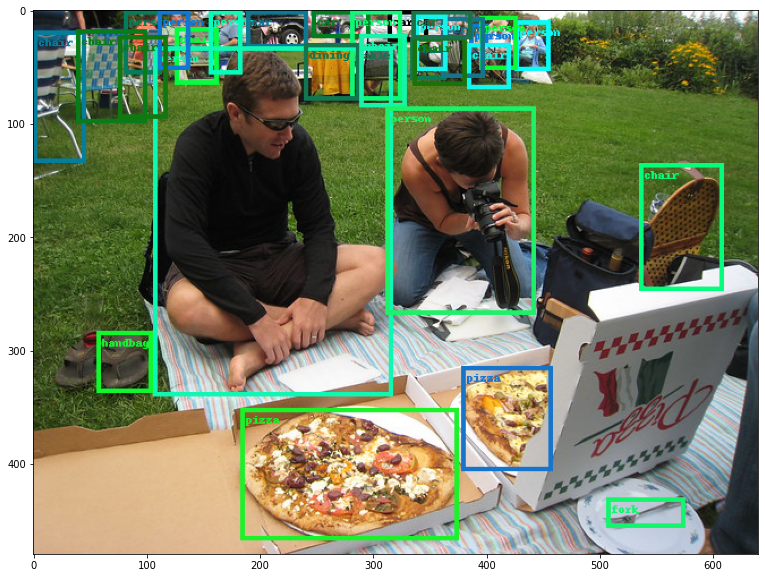

In [140]:
import torchvision
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes
fig = plt.figure(figsize=(14, 10))
plt.imshow((draw_bounding_boxes(new_image,y,label_list, width=4)).permute(1, 2, 0))